> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

## Welcome to my analysis! 

>In this project I will be analysis Movies Dataset to answer two questions. First question will be about correlation between cost of movie and grades whith it get. I want to check if it allways true that Movies with big budget are better. Second question will be about gener and its popularity. I want to see how changing viewers preferences year by year and what is now most catche gener. 

In [2]:
# import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# import date and print few lines.
df = pd.read_csv('tmdb-movies.csv')

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [68]:
df.describe()

,popularity,budget,vote_average,release_year
count,5168.000000,5.168000e+03,5168.000000,5168.000000
mean,0.992525,3.074552e+07,6.032895,2001.257159
std,1.329360,3.890583e+07,0.883203,11.769554
min,0.001117,1.000000e+00,1.500000,1960.000000
25%,0.348157,6.000000e+06,5.500000,1996.000000
50%,0.624462,1.700000e+07,6.100000,2005.000000
75%,1.152547,4.000000e+07,6.600000,2010.000000
max,32.985763,4.250000e+08,8.400000,2015.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
#drop columns with i will not going to use
df.drop(['id','imdb_id','original_title','revenue', 'cast', 'homepage','director', 'tagline','keywords', 'overview', 'runtime','production_companies','release_date','vote_count', 'budget_adj', 'revenue_adj' ], axis=1, inplace=True)

In [8]:
df.head()

,popularity,budget,genres,vote_average,release_year
0,32.985763,150000000,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,Action|Crime|Thriller,7.3,2015


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
genres          10843 non-null object
vote_average    10866 non-null float64
release_year    10866 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 424.5+ KB


> Because there are movies with more than one genre (will have a string that holds more than one value) I am going to separate this.

In [10]:
def split_columns(df, column):
    new_df = df[column].str.split('|', expand = True)
    names_df = list(new_df)
    for name in names_df:
        names_df[name] = column + str(name)
    new_df.columns = names_df
    
    return new_df

In [11]:
new_df_genre = split_columns(df, 'genres')
df = df.join(new_df_genre)

In [12]:
df.head()

,popularity,budget,genres,vote_average,release_year,genres0,genres1,genres2,genres3,genres4
0,32.985763,150000000,Action|Adventure|Science Fiction|Thriller,6.5,2015,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150000000,Action|Adventure|Science Fiction|Thriller,7.1,2015,Action,Adventure,Science Fiction,Thriller,None
2,13.112507,110000000,Adventure|Science Fiction|Thriller,6.3,2015,Adventure,Science Fiction,Thriller,None,None
3,11.173104,200000000,Action|Adventure|Science Fiction|Fantasy,7.5,2015,Action,Adventure,Science Fiction,Fantasy,None
4,9.335014,190000000,Action|Crime|Thriller,7.3,2015,Action,Crime,Thriller,None,None


> I got a lot of 0 values in budget and revenue. Because of it i cant answer my question so I need to drop it.


In [13]:
df.isnull().sum()

popularity          0
budget              0
genres             23
vote_average        0
release_year        0
genres0            23
genres1          2351
genres2          5787
genres3          8885
genres4         10324
dtype: int64

> Cause more than half values i naan i drop these columns

In [14]:
#Replace 0 values by nan
df = df.replace(0, pd.np.nan)

> Del Col with missing values. There are it to much so i left only the best one. 



In [16]:
#Drop nan columns
df.drop(['genres','genres1','genres2', 'genres3', 'genres4'], axis=1, inplace=True)

In [17]:
#drop rows with missing values
df.duplicated().any()

True

In [18]:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 5 columns):
popularity      10865 non-null float64
budget          5169 non-null float64
vote_average    10865 non-null float64
release_year    10865 non-null int64
genres0         10842 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 509.3+ KB


In [19]:
df.head()

,popularity,budget,vote_average,release_year,genres0
0,32.985763,150000000.0,6.5,2015,Action
1,28.419936,150000000.0,7.1,2015,Action
2,13.112507,110000000.0,6.3,2015,Adventure
3,11.173104,200000000.0,7.5,2015,Action
4,9.335014,190000000.0,7.3,2015,Action


In [21]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5168 entries, 0 to 10865
Data columns (total 5 columns):
popularity      5168 non-null float64
budget          5168 non-null float64
vote_average    5168 non-null float64
release_year    5168 non-null int64
genres0         5168 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 242.2+ KB


In [53]:
df1 = df.sort_values(by=['budget'])

In [54]:
df.describe()

,popularity,budget,vote_average,release_year
count,5168.000000,5.168000e+03,5168.000000,5168.000000
mean,0.992525,3.074552e+07,6.032895,2001.257159
std,1.329360,3.890583e+07,0.883203,11.769554
min,0.001117,1.000000e+00,1.500000,1960.000000
25%,0.348157,6.000000e+06,5.500000,1996.000000
50%,0.624462,1.700000e+07,6.100000,2005.000000
75%,1.152547,4.000000e+07,6.600000,2010.000000
max,32.985763,4.250000e+08,8.400000,2015.000000


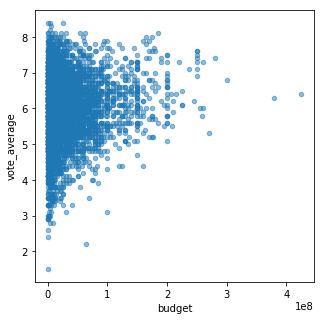

In [69]:
df1.plot(x='budget',y='vote_average', kind='scatter',legend=False, alpha=0.5, figsize=(5,5))

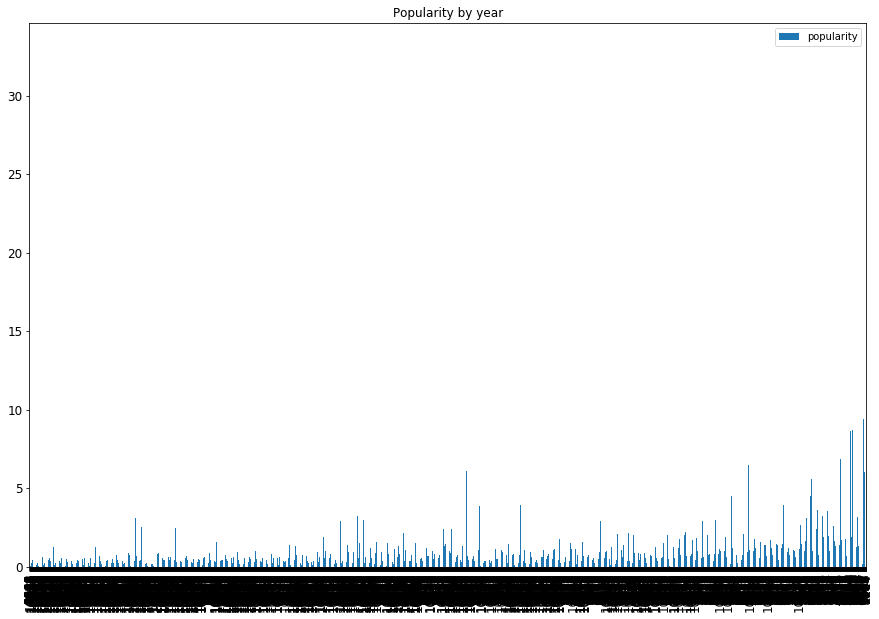

In [70]:
df1[['genres0','popularity']].plot(kind='bar', title ="Popularity by year", figsize=(15, 10), legend=True, fontsize=12)



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [275]:
df.head()

,popularity,budget,vote_average,release_year,genres0,genres1
20,5.462138,190000000.0,6.2,2015,Action,Family
37,3.339135,175000000.0,6.6,2015,Adventure,Animation
38,3.237370,50000000.0,6.3,2015,Action,Crime
46,2.976436,135000000.0,6.9,2015,Fantasy,Comedy
49,2.885126,4000000.0,6.6,2015,Thriller,Comedy


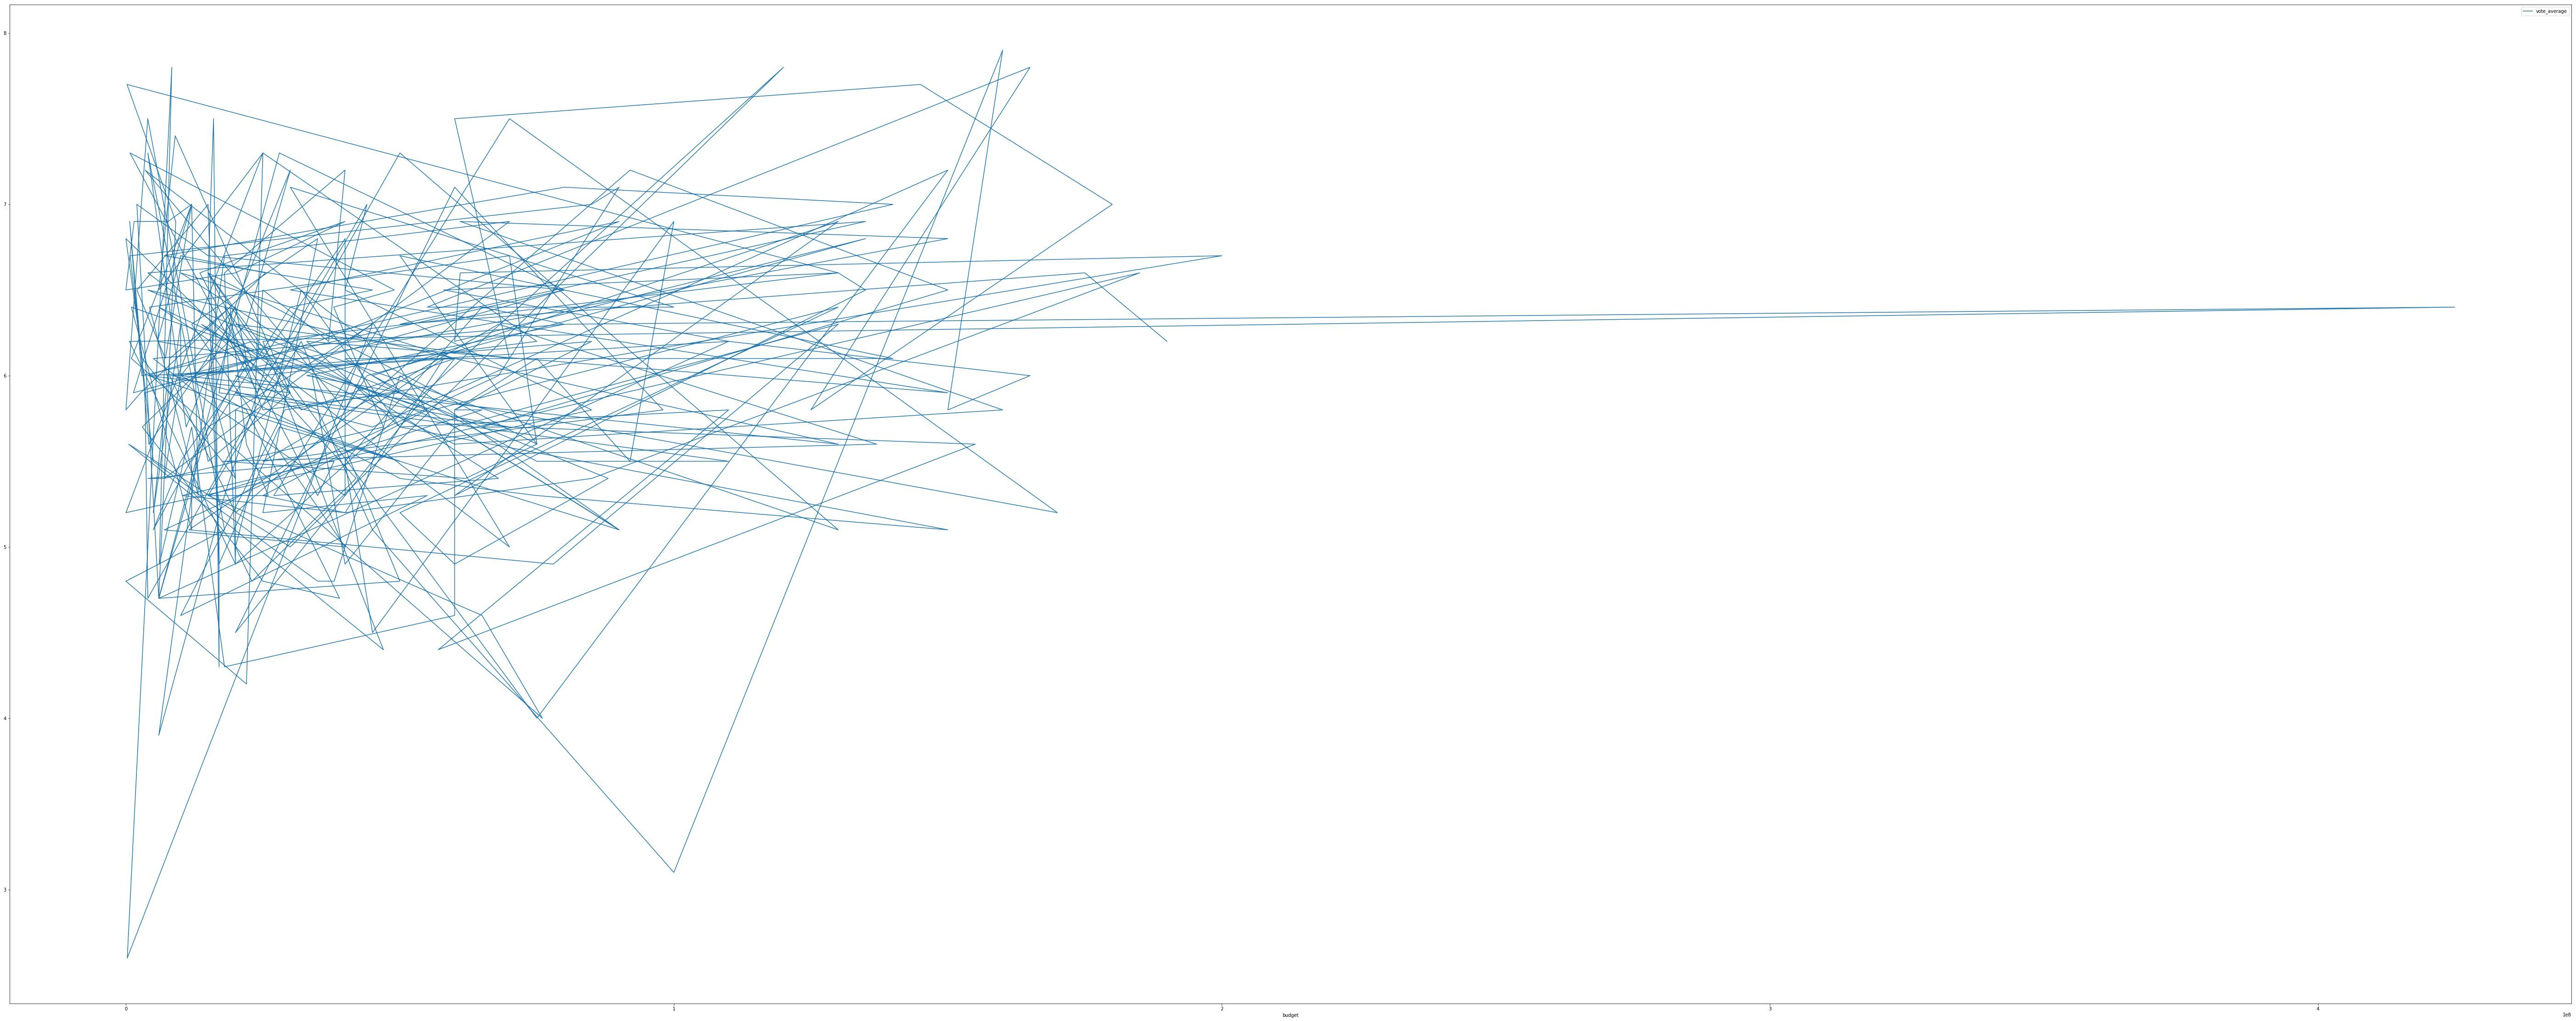

In [273]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.plot()

In [249]:
df = pd.DataFrame(np.random.randn(60, 4), index=ts.index, columns=list('popularity', 'genres0'))

In [6]: df = df.cumsum()

In [7]: plt.figure(); df.plot();

TypeError: list() takes at most 1 argument (2 given)

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!